# Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

from sqlalchemy import create_engine

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

print(confusion_matrix(y, y_pred))

kmeans.inertia_

[[ 0 50  0]
 [50  0  0]
 [50  0  0]]


222.36170496502308

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

print(confusion_matrix(y, y_pred))

kmeans.inertia_

[[ 0 50  0]
 [11  0 39]
 [36  0 14]]


139.82049635974982

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

print(confusion_matrix(y, y_pred))

kmeans.inertia_

[[ 0 22  0 28]
 [11  0 39  0]
 [36  0 14  0]
 [ 0  0  0  0]]


114.09254690403091

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

print(confusion_matrix(y, y_pred))

kmeans.inertia_

[[ 0 25 25  0  0]
 [27  0  0 21  2]
 [21  0  0  2 27]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


90.80728315078541

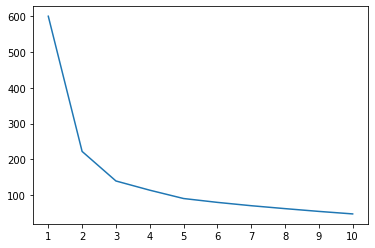

In [8]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.xticks(np.arange(1, 11, step=1))
plt.plot(np.arange(1, 11, step=1), inertia)

plt.show()

In the examples above we can see that setting the number of clusters to 3 provides the best result for this dataset. This can be seen because after this point there is only a gradual decrease in inertia.

# Heart Disease dataset

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [10]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'
                      .format(postgres_user, postgres_pw, postgres_host, 
                              postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)

engine.dispose()

In [11]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [13]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

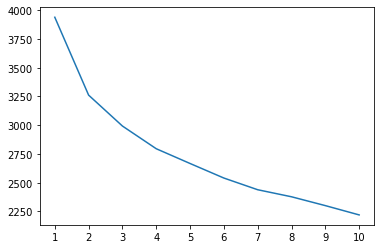

In [14]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.xticks(np.arange(1, 11, step=1))
plt.plot(np.arange(1, 11, step=1), inertia)

plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

print(confusion_matrix(y, y_pred))

kmeans.inertia_

[[ 7 79 32 21]
 [64 10 71 19]
 [ 0  0  0  0]
 [ 0  0  0  0]]


2794.9491164222127